## Image Segmentation

### Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift

from PIL import Image

# reduce size of original image to reduce computation time
size = (200,200)

#### function for displaying images

In [2]:
def plot_two_images(figure_title, image1, label1, image2, label2):
    
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 2, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 2, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)
    
    plt.show()

In [3]:
def plot_three_images(figure_title, image1, label1, image2, label2, image3, label3):
    
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)
    
    plt.show()

#### Function for applying meanshift algorithm

In [4]:
def apply_meanshift(img):
    
    # TODO: Apply Meanshift on image
    # Follow the following hints as per the lab specification.

    # Step 1 - Extract the three RGB colour channels
    img = np.array(img)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    
    # Step 2 - Combine the three colour channels by flatten each channel 
    # then stacking the flattened channels together.
    # This gives the "colour_samples"
    red = img_RGB[:,:,0]
    green = img_RGB[:,:,1]
    blue = img_RGB[:,:,2]
    colour_samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
    a, b = red.shape
    
    # Step 3 - Perform Meanshift clustering
    # For larger images, this may take a few minutes to compute.
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples)
    #print(ms_labels)
    # Step 4 - reshape ms_labels back to the original image shape 
    # for displaying the segmentation output 
    ms_labels = ms_labels.reshape(a,b)
    
    return ms_labels

#### Function for applying watershed algorithm

In [5]:
def apply_watershed(img, threshold=None):
    
    # TODO: Apply Watershed on image
    # Follow the following hints as per the lab specification.
    img = np.array(img)
    # Step 1 - Convert the image to gray scale
    # and convert the image to a numpy matrix
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, img_thresh = cv2.threshold(img_gray, 125, 250, cv2.THRESH_BINARY)
    #img_array = []
    
    # Step 2 - Calculate the distance transform
    # Hint: use ndi.distance_transform_edt(img_array)
    distance = ndi.distance_transform_edt(img_thresh)
    
    # Step 3 - Generate the watershed markers
    # Hint: use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # using ndi.label() -- note the markers are the 0th output to this function
    local_maxi = peak_local_max(distance, footprint=np.ones((3,3)), labels=img_thresh)
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(local_maxi.T)] = True
    markers, _ = ndi.label(mask)
    
    # Step 4 - Perform watershed and store the labels
    # Hint: use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask
    ws_labels = watershed(-distance, markers, mask=img_thresh)
    
    return ws_labels, distance

### Q1. Use the MeanShift algorithm to segment images. Images to be used for this task: `clever-shapes.png` and `coke-bottles.png`


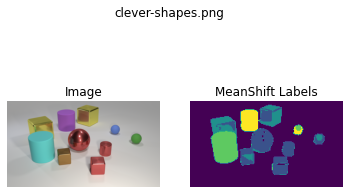

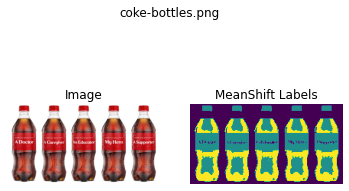

In [6]:
# read two images in list
two_images = ["clever-shapes.png", "coke-bottles.png"]

# Loop over the images
for img_path in two_images:
    
    # Read image
    img = Image.open(img_path)
    img.thumbnail(size)

    # apply meanshift algorithm on the image
    ms_labels = apply_meanshift(img)
    
    # Read and plot the original image
    img = Image.open(img_path)

    plot_two_images(img_path, img, "Image", ms_labels, "MeanShift Labels")
    

### Q2. Use Watershed transformation to segment images. Images to be used for this task: `clever-shapes.png` and `coke-bottles.png`

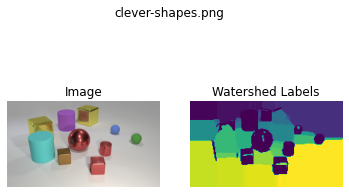

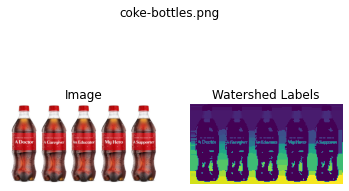

In [7]:
# Loop over the images
for img_path in two_images:
    
    # Read image
    img = Image.open(img_path)
    img.thumbnail(size)
     
    # Apply Watershed algorithm
    ws_labels, distance = apply_watershed(img)

    # Read the original image
    img = Image.open(img_path)

    plot_two_images(img_path, img, "Image", ws_labels, "Watershed Labels")

### Q3. Compare MeanShift and Watershed segmentation results. Image to be used for this task: `blueberries.png`

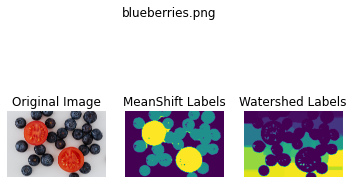

In [8]:
# Read image
img_path = "blueberries.png"
img = Image.open(img_path)
img.thumbnail(size)

img_mat = np.array(img)

ms_labels = apply_meanshift(img)
    
# Apply watershed with global thresholding
ws_labels, distance = apply_watershed(img)

# Read the original image
img = Image.open(img_path)

plot_three_images(img_path, img, "Original Image",
                      ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")